In [384]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [385]:
from bart_playground import Tree, Parameters
from bart_playground import Grow, Prune, Change, Swap
from bart_playground import Dataset
from bart_playground import visualize_tree 
from bart_playground import *  # Import the updated DataGenerator class

In [386]:
dgen = DataGenerator(n_samples=100, n_features=3, noise=0.1, random_seed=42)
X, y = dgen.generate(scenario="linear")
data = Dataset(X, y, X)

rng = np.random.default_rng()

In [387]:
def tearDown(filename):
    expected_filepath = f"{filename}.png"
    if os.path.exists(expected_filepath):
        os.remove(expected_filepath)

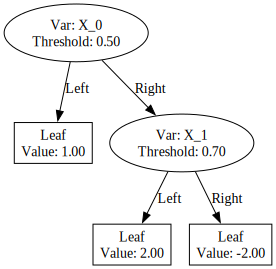

In [388]:
tree1 = Tree(data=data)
tree1.vars = np.array([0,-1, 1, -2, -2, -1, -1, -2], dtype=int)
tree1.thresholds = np.array([0.5, np.nan, 0.7, np.nan, np.nan, np.nan, np.nan, np.nan])
tree1.leaf_vals = np.array([np.nan, 1.0, np.nan, np.nan, np.nan, 2.0, -2.0, np.nan])
filename1 = "tree1"
visualize_tree(tree1, tree1, filename=filename1, format="png")

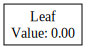

In [389]:
tree2 = Tree(data=data)
# tree2.vars = np.array([2,-1, -1, -2,-2,-2,-2,-2], dtype=int)
# tree2.thresholds = np.array([0.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
# tree2.leaf_vals = np.array([np.nan, 3.0, -3.0, np.nan, np.nan, np.nan, np.nan, np.nan])
# tree2.n = np.array([100,-2,-2,-2,-2,-2,-2,-2])

filename2 = "tree2"
visualize_tree(tree2, tree2, filename=filename2, format="png")

In [390]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)
params.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.5 nan 0.7 nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2]),
 Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

In [391]:
tearDown(filename1)
tearDown(filename2)

# Grow

In [392]:
node_id = rng.choice(tree2.leaves)
left_child = node_id * 2 + 1
right_child = node_id * 2 + 2
node_id,left_child,right_child

(0, 1, 2)

In [393]:
var = rng.integers(tree2.data.p)
threshold = rng.choice(tree2.data.thresholds[var])
var,threshold

(2, 0.12811363267554587)

In [394]:
tree2._resize_arrays()
x_bigger = tree2.data.X[:, var] > threshold
tree2.node_indicators[:, left_child] = tree2.node_indicators[:, node_id] & ~x_bigger
tree2.node_indicators[:, right_child] = tree2.node_indicators[:, node_id] & x_bigger


In [395]:
tree2.node_indicators

array([[ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False]])

In [396]:
tree2.n[left_child] = np.sum(tree2.node_indicators[:, left_child])
tree2.n[right_child] = np.sum(tree2.node_indicators[:, right_child])
tree2

Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], n_vals=[100  14  86  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2])

In [397]:
move = Grow(params, [1])
move.propose(rng)

True

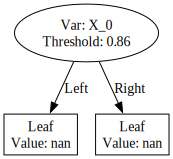

In [398]:
tree_g = move.proposed.trees[1]
filename1 = "tree_g"
visualize_tree(tree_g, tree_g, filename=filename1, format="png")

# Prune

In [399]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)

move = Prune(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.5 nan nan nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan nan nan nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2]),
 Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], n_vals=[100  14  86  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2])]

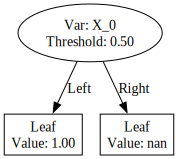

In [400]:
tree_p = move.proposed.trees[0]
filename2 = "tree_p"
visualize_tree(tree_p, tree_p, filename=filename2, format="png")

# Change

In [401]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)

move = Change(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 2 -1  1 -2 -2 -1 -1 -2], thresholds=[0.78606431        nan 0.7               nan        nan        nan
         nan        nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  83  17  -2  -2  14   3  -2]),
 Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], n_vals=[100  14  86  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2])]

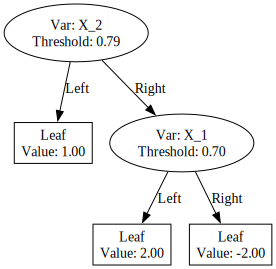

In [402]:
tree_c = move.proposed.trees[0]
filename3 = "tree_c"
visualize_tree(tree_c, tree_c, filename=filename3, format="png")

# Swap

In [403]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)

move = Swap(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 1 -1  0 -2 -2 -1 -1 -2], thresholds=[0.7 nan 0.5 nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  69  31  -2  -2  15  16  -2]),
 Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan], n_vals=[100  14  86  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2])]

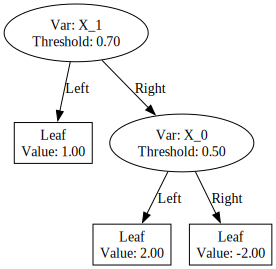

In [404]:
tree_s = move.proposed.trees[0]
filename4 = "tree_s"
visualize_tree(tree_s, tree_s, filename=filename4, format="png")

In [405]:
tearDown(filename1)
tearDown(filename2)
tearDown(filename3)
tearDown(filename4)